In [55]:
import os

path = os.path.join(os.path.dirname(os.getcwd()), "data")
msp_file = os.path.join(path, "MoNA-export-GC-MS.msp")

In [56]:
from matchms.filtering import normalize_intensities
from matchms.filtering import reduce_to_number_of_peaks
from matchms.filtering import select_by_mz
from matchms.filtering import require_minimum_number_of_peaks
import random

def apply_my_filters(s):
    s = normalize_intensities(s)
    s = reduce_to_number_of_peaks(s, n_required=10, ratio_desired=0.5)
    s = select_by_mz(s, mz_from=0, mz_to=1000)
    s = require_minimum_number_of_peaks(s, n_required=10)
    return s

def group_by_inchikey(spectrums):
    grouped_spectrum = []
    inchikeys = []
    for s in spectrums:
        inchikey = s.metadata.get('inchikey').split('-', 1)[0]
        if inchikey not in inchikeys:
            inchikeys.append(inchikey)
            grouped_spectrum.append([s]) 
        else:
            index = inchikeys.index(inchikey)
            grouped_spectrum[index].append(s)
    return grouped_spectrum

def separate_by_same_inchikey(spectrums):
    return random.sample([k for k in group_by_inchikey(spectrums) if len(k) == 2], 1000)

def separate_by_diff_inchikey(spectrums):
    grouped_spectrum = group_by_inchikey(spectrums)
    shuffled1 = random.sample(grouped_spectrum, len(grouped_spectrum))
    shuffled2 = random.sample(grouped_spectrum, len(grouped_spectrum))
    selectec_spectra = []
    for n in range(0, 1000):
        selectec_spectra.append([shuffled1[n][0], shuffled2[n][0]])
    return selectec_spectra

In [57]:
def calculate_similarity_scores(spectrums):
    scores_hist = []
    for k, spectrums in enumerate(group_spectra):
        scores = calculate_scores(references=spectrums,
                                queries=spectrums,
                                similarity_function=CosineGreedy())

        print(k+1, "================================")
        for k, score in enumerate(scores):
            if k > 0 and k < 3:
                (reference, query, score, n_matching) = score

                scores_hist.append(score)

                # Ignore scores between same spectrum and
                # pairs which have less than 20 peaks in common
                print(f"Reference scan name: {reference.metadata['name']} - Query scan name: {query.metadata['name']}")
                print(f"Reference InChiKey: {reference.metadata['inchikey']} - Query InChiKey: {query.metadata['inchikey']}")
                print(f"Score: {score:.4f}")
                print(f"Number of matching peaks: {n_matching}")
                print("----------------------------")

    return scores_hist

In [58]:
from matchms.importing import load_from_msp

spectrums = [apply_my_filters(s) for s in load_from_msp(msp_file)]

spectrums = [s for s in spectrums if s is not None]

In [59]:
from matchms import calculate_scores
from matchms.similarity import CosineGreedy

copy_spectra = spectrums.copy()
group_spectra = separate_by_same_inchikey(copy_spectra)
scores_hist = calculate_similarity_scores(group_spectra)

1 ================================
Reference scan name: 4-pyridoxic acid - Query scan name: 4-pyridoxic acid
Reference InChiKey: hxacouqixzgnbf-uhfffaoysa-n - Query InChiKey: hxacouqixzgnbf-uhfffaoysa-n
Score: 0.4145
Number of matching peaks: 79
----------------------------
Reference scan name: 4-pyridoxic acid - Query scan name: 4-pyridoxic acid
Reference InChiKey: hxacouqixzgnbf-uhfffaoysa-n - Query InChiKey: hxacouqixzgnbf-uhfffaoysa-n
Score: 0.4145
Number of matching peaks: 79
----------------------------
2 ================================
Reference scan name: 2,5-dimethylbenzoic acid trimethylsilyl ester - Query scan name: 2,5-dimethylbenzoic acid trimethylsilyl ester
Reference InChiKey: dddbdwyebrvnbb-uhfffaoysa-n - Query InChiKey: dddbdwyebrvnbb-uhfffaoysa-n
Score: 1.0000
Number of matching peaks: 15
----------------------------
Reference scan name: 2,5-dimethylbenzoic acid trimethylsilyl ester - Query scan name: 2,5-dimethylbenzoic acid trimethylsilyl ester
Reference InChiKey: 

104 ================================
Reference scan name: sitosterol acetate - Query scan name: clionasteryl-acetate
Reference InChiKey: pbwoipculuxtny-lbkbyztlsa-n - Query InChiKey: pbwoipculuxtny-umkhifofsa-n
Score: 0.7132
Number of matching peaks: 82
----------------------------
Reference scan name: clionasteryl-acetate - Query scan name: sitosterol acetate
Reference InChiKey: pbwoipculuxtny-umkhifofsa-n - Query InChiKey: pbwoipculuxtny-lbkbyztlsa-n
Score: 0.7132
Number of matching peaks: 82
----------------------------
105 ================================
Reference scan name: methyl propyl ether - Query scan name: methyl n-propyl ether
Reference InChiKey: vnkytqgiuynrmy-uhfffaoysa-n - Query InChiKey: vnkytqgiuynrmy-uhfffaoysa-n
Score: 0.9689
Number of matching peaks: 14
----------------------------
Reference scan name: methyl n-propyl ether - Query scan name: methyl propyl ether
Reference InChiKey: vnkytqgiuynrmy-uhfffaoysa-n - Query InChiKey: vnkytqgiuynrmy-uhfffaoysa-n
Score: 0.9

167 ================================
Reference scan name: methyl tetracosanoate - Query scan name: tetracosanoic acid methyl ester
Reference InChiKey: xudjzdnuvzhskz-uhfffaoysa-n - Query InChiKey: xudjzdnuvzhskz-uhfffaoysa-n
Score: 0.0483
Number of matching peaks: 36
----------------------------
Reference scan name: tetracosanoic acid methyl ester - Query scan name: methyl tetracosanoate
Reference InChiKey: xudjzdnuvzhskz-uhfffaoysa-n - Query InChiKey: xudjzdnuvzhskz-uhfffaoysa-n
Score: 0.0483
Number of matching peaks: 36
----------------------------
168 ================================
Reference scan name: propyl formate - Query scan name: propyl formate
Reference InChiKey: kfnniilcvolyir-uhfffaoysa-n - Query InChiKey: kfnniilcvolyir-uhfffaoysa-n
Score: 0.9235
Number of matching peaks: 16
----------------------------
Reference scan name: propyl formate - Query scan name: propyl formate
Reference InChiKey: kfnniilcvolyir-uhfffaoysa-n - Query InChiKey: kfnniilcvolyir-uhfffaoysa-n
Score:

233 ================================
Reference scan name: 2,5-pyridinedicarboxylic acid - Query scan name: 2,5-pyridinedicarboxylic acid
Reference InChiKey: lvpmimzxdybcdf-uhfffaoysa-n - Query InChiKey: lvpmimzxdybcdf-uhfffaoysa-n
Score: 0.5152
Number of matching peaks: 28
----------------------------
Reference scan name: 2,5-pyridinedicarboxylic acid - Query scan name: 2,5-pyridinedicarboxylic acid
Reference InChiKey: lvpmimzxdybcdf-uhfffaoysa-n - Query InChiKey: lvpmimzxdybcdf-uhfffaoysa-n
Score: 0.5152
Number of matching peaks: 28
----------------------------
234 ================================
Reference scan name: methyl 2,3-o-isopropylidene-alpha-l-rhamnopyranoside - Query scan name: methyl 2,3-o-isopropylidene-alpha-l-rhamnopyranoside (2,2,2,3,3,3-d6)
Reference InChiKey: tvkkwqajqzhtdn-ofpupoevsa-n - Query InChiKey: tvkkwqajqzhtdn-ofpupoevsa-n
Score: 0.3101
Number of matching peaks: 57
----------------------------
Reference scan name: methyl 2,3-o-isopropylidene-alpha-l-rhamnopy

Reference scan name: hydroxyurea - Query scan name: hydroxyurea
Reference InChiKey: vsnhcauresnica-uhfffaoysa-n - Query InChiKey: vsnhcauresnica-uhfffaoysa-n
Score: 0.1799
Number of matching peaks: 86
----------------------------
Reference scan name: hydroxyurea - Query scan name: hydroxyurea
Reference InChiKey: vsnhcauresnica-uhfffaoysa-n - Query InChiKey: vsnhcauresnica-uhfffaoysa-n
Score: 0.1799
Number of matching peaks: 86
----------------------------
286 ================================
Reference scan name: 2-oxo-4-methylthiobutanoic acid - Query scan name: 2-oxo-4-methylthiobutanoic acid
Reference InChiKey: sxfsqzdsuwackx-uhfffaoysa-n - Query InChiKey: sxfsqzdsuwackx-uhfffaoysa-n
Score: 0.7420
Number of matching peaks: 52
----------------------------
Reference scan name: 2-oxo-4-methylthiobutanoic acid - Query scan name: 2-oxo-4-methylthiobutanoic acid
Reference InChiKey: sxfsqzdsuwackx-uhfffaoysa-n - Query InChiKey: sxfsqzdsuwackx-uhfffaoysa-n
Score: 0.7420
Number of matching pe

342 ================================
Reference scan name: 4-(3-(4-hydroxyphenoxy)propyl)morpholine - Query scan name: 4-(3-(4-hydroxyphenoxy)propyl)morpholine
Reference InChiKey: jwsolkamuaxncd-uhfffaoysa-n - Query InChiKey: jwsolkamuaxncd-uhfffaoysa-n
Score: 0.1632
Number of matching peaks: 17
----------------------------
Reference scan name: 4-(3-(4-hydroxyphenoxy)propyl)morpholine - Query scan name: 4-(3-(4-hydroxyphenoxy)propyl)morpholine
Reference InChiKey: jwsolkamuaxncd-uhfffaoysa-n - Query InChiKey: jwsolkamuaxncd-uhfffaoysa-n
Score: 0.1632
Number of matching peaks: 17
----------------------------
343 ================================
Reference scan name: 1,2-benzenedicarboxylic acid hexyl octyl ester - Query scan name: 1,2-benzenedicarboxylic acid hexyl octyl ester
Reference InChiKey: lzctxagbgklubx-uhfffaoysa-n - Query InChiKey: lzctxagbgklubx-uhfffaoysa-n
Score: 0.5895
Number of matching peaks: 14
----------------------------
Reference scan name: 1,2-benzenedicarboxylic acid 

Reference InChiKey: xkglskvnoshtad-uhfffaoysa-n - Query InChiKey: xkglskvnoshtad-uhfffaoysa-n
Score: 0.9499
Number of matching peaks: 17
----------------------------
Reference scan name: valerophenone - Query scan name: butyl phenyl ketone
Reference InChiKey: xkglskvnoshtad-uhfffaoysa-n - Query InChiKey: xkglskvnoshtad-uhfffaoysa-n
Score: 0.9499
Number of matching peaks: 17
----------------------------
421 ================================
Reference scan name: bicyclo(4.3.0)nonan-7-one - Query scan name: bicyclo(4.3.0)nonan-7-one
Reference InChiKey: atksquyihkmktg-uhfffaoysa-n - Query InChiKey: atksquyihkmktg-uhfffaoysa-n
Score: 0.7892
Number of matching peaks: 48
----------------------------
Reference scan name: bicyclo(4.3.0)nonan-7-one - Query scan name: bicyclo(4.3.0)nonan-7-one
Reference InChiKey: atksquyihkmktg-uhfffaoysa-n - Query InChiKey: atksquyihkmktg-uhfffaoysa-n
Score: 0.7892
Number of matching peaks: 48
----------------------------
422 ================================
Refe

486 ================================
Reference scan name: 8-hydroxy-3,7-dimethyl-2,6-octadieneyl acetate(z) - Query scan name: 8-hydroxy-3,7-dimethyl-2,6-octadienyl acetate(e)
Reference InChiKey: hzijxisizgwhay-ikvlvdhlsa-n - Query InChiKey: hzijxisizgwhay-nxaioardsa-n
Score: 0.7758
Number of matching peaks: 35
----------------------------
Reference scan name: 8-hydroxy-3,7-dimethyl-2,6-octadienyl acetate(e) - Query scan name: 8-hydroxy-3,7-dimethyl-2,6-octadieneyl acetate(z)
Reference InChiKey: hzijxisizgwhay-nxaioardsa-n - Query InChiKey: hzijxisizgwhay-ikvlvdhlsa-n
Score: 0.7758
Number of matching peaks: 35
----------------------------
487 ================================
Reference scan name: d-mannose 1-phosphate - Query scan name: glucose-1-phosphate
Reference InChiKey: hxxfsfrbohsimq-qtvwnmprsa-n - Query InChiKey: hxxfsfrbohsimq-vfuothlcsa-n
Score: 0.5827
Number of matching peaks: 70
----------------------------
Reference scan name: glucose-1-phosphate - Query scan name: d-mannos

Reference scan name: 2,4-dimethoxycinnamic acid - Query scan name: trans-2,4-dimethoxycinnamic acid
Reference InChiKey: yikhdphtfywyjv-gqctyliasa-n - Query InChiKey: yikhdphtfywyjv-gqctyliasa-n
Score: 0.8299
Number of matching peaks: 58
----------------------------
Reference scan name: trans-2,4-dimethoxycinnamic acid - Query scan name: 2,4-dimethoxycinnamic acid
Reference InChiKey: yikhdphtfywyjv-gqctyliasa-n - Query InChiKey: yikhdphtfywyjv-gqctyliasa-n
Score: 0.8299
Number of matching peaks: 58
----------------------------
546 ================================
Reference scan name: 3-(benzylamino)pentadecanoic acid - Query scan name: 3-(benzylamino)pentadecanoic acid
Reference InChiKey: urbznyxwhogcjc-uhfffaoysa-n - Query InChiKey: urbznyxwhogcjc-uhfffaoysa-n
Score: 1.0000
Number of matching peaks: 14
----------------------------
Reference scan name: 3-(benzylamino)pentadecanoic acid - Query scan name: 3-(benzylamino)pentadecanoic acid
Reference InChiKey: urbznyxwhogcjc-uhfffaoysa-n -

617 ================================
Reference scan name: isobutyraldehyde - Query scan name: isobutylaldehyde
Reference InChiKey: amimrnsirudhcm-uhfffaoysa-n - Query InChiKey: amimrnsirudhcm-uhfffaoysa-n
Score: 0.7983
Number of matching peaks: 12
----------------------------
Reference scan name: isobutylaldehyde - Query scan name: isobutyraldehyde
Reference InChiKey: amimrnsirudhcm-uhfffaoysa-n - Query InChiKey: amimrnsirudhcm-uhfffaoysa-n
Score: 0.7983
Number of matching peaks: 12
----------------------------
618 ================================
Reference scan name: 16-hydroxyhexadecanoic acid - Query scan name: 16-hydroxyhexadecanoic acid
Reference InChiKey: ugagpnkcdrtdhp-uhfffaoysa-n - Query InChiKey: ugagpnkcdrtdhp-uhfffaoysa-n
Score: 0.2328
Number of matching peaks: 82
----------------------------
Reference scan name: 16-hydroxyhexadecanoic acid - Query scan name: 16-hydroxyhexadecanoic acid
Reference InChiKey: ugagpnkcdrtdhp-uhfffaoysa-n - Query InChiKey: ugagpnkcdrtdhp-uhfffao

688 ================================
Reference scan name: diisopropyl malonate - Query scan name: diisopropyl malonate
Reference InChiKey: qrvsdvdfjfkyka-uhfffaoysa-n - Query InChiKey: qrvsdvdfjfkyka-uhfffaoysa-n
Score: 0.6947
Number of matching peaks: 24
----------------------------
Reference scan name: diisopropyl malonate - Query scan name: diisopropyl malonate
Reference InChiKey: qrvsdvdfjfkyka-uhfffaoysa-n - Query InChiKey: qrvsdvdfjfkyka-uhfffaoysa-n
Score: 0.6947
Number of matching peaks: 24
----------------------------
689 ================================
Reference scan name: trans-aconitic acid trimethyl ester - Query scan name: 1-propene-1,2,3-tricarboxylic acid trimethyl ester
Reference InChiKey: dzaibgwgbbqgpz-gqctyliasa-n - Query InChiKey: dzaibgwgbbqgpz-gqctyliasa-n
Score: 0.0506
Number of matching peaks: 15
----------------------------
Reference scan name: 1-propene-1,2,3-tricarboxylic acid trimethyl ester - Query scan name: trans-aconitic acid trimethyl ester
Reference 

737 ================================
Reference scan name: 3,4,5-trimethoxybenzoic acid methyl ester - Query scan name: 3,4,5-trimethoxybenzoic acid methyl ester
Reference InChiKey: kachfmohopltnx-uhfffaoysa-n - Query InChiKey: kachfmohopltnx-uhfffaoysa-n
Score: 0.3770
Number of matching peaks: 21
----------------------------
Reference scan name: 3,4,5-trimethoxybenzoic acid methyl ester - Query scan name: 3,4,5-trimethoxybenzoic acid methyl ester
Reference InChiKey: kachfmohopltnx-uhfffaoysa-n - Query InChiKey: kachfmohopltnx-uhfffaoysa-n
Score: 0.3770
Number of matching peaks: 21
----------------------------
738 ================================
Reference scan name: mesityl oxide - Query scan name: 2-methyl-2-penten-4-one
Reference InChiKey: shojxdktykfbrd-uhfffaoysa-n - Query InChiKey: shojxdktykfbrd-uhfffaoysa-n
Score: 0.9123
Number of matching peaks: 23
----------------------------
Reference scan name: 2-methyl-2-penten-4-one - Query scan name: mesityl oxide
Reference InChiKey: shoj

Reference InChiKey: akiijalhgmkjej-uhfffaoysa-n - Query InChiKey: akiijalhgmkjej-uhfffaoysa-n
Score: 0.4774
Number of matching peaks: 22
----------------------------
837 ================================
Reference scan name: cyclohexyl isovalerate - Query scan name: 3-methylbutanoic acid cyclohexyl ester
Reference InChiKey: sqpokbbcnziwfi-uhfffaoysa-n - Query InChiKey: sqpokbbcnziwfi-uhfffaoysa-n
Score: 0.6610
Number of matching peaks: 33
----------------------------
Reference scan name: 3-methylbutanoic acid cyclohexyl ester - Query scan name: cyclohexyl isovalerate
Reference InChiKey: sqpokbbcnziwfi-uhfffaoysa-n - Query InChiKey: sqpokbbcnziwfi-uhfffaoysa-n
Score: 0.6610
Number of matching peaks: 33
----------------------------
838 ================================
Reference scan name: 5-fluorodeoxyuridine - Query scan name: 5-fluorodeoxyuridine
Reference InChiKey: odknjvuhoimiiz-rrkcrqdmsa-n - Query InChiKey: odknjvuhoimiiz-rrkcrqdmsa-n
Score: 0.0831
Number of matching peaks: 10
-----

----------------------------
920 ================================
Reference scan name: 1,3-diphenylacetone - Query scan name: 1,3-diphenylacetone
Reference InChiKey: yfkbxygusoxjgs-uhfffaoysa-n - Query InChiKey: yfkbxygusoxjgs-uhfffaoysa-n
Score: 0.8470
Number of matching peaks: 12
----------------------------
Reference scan name: 1,3-diphenylacetone - Query scan name: 1,3-diphenylacetone
Reference InChiKey: yfkbxygusoxjgs-uhfffaoysa-n - Query InChiKey: yfkbxygusoxjgs-uhfffaoysa-n
Score: 0.8470
Number of matching peaks: 12
----------------------------
921 ================================
Reference scan name: lilyaldehyde - Query scan name: 2-methyl-3-(4-t-butylphenyl)propionaldehyde
Reference InChiKey: sdqfdholcgwzpu-uhfffaoysa-n - Query InChiKey: sdqfdholcgwzpu-uhfffaoysa-n
Score: 0.9416
Number of matching peaks: 48
----------------------------
Reference scan name: 2-methyl-3-(4-t-butylphenyl)propionaldehyde - Query scan name: lilyaldehyde
Reference InChiKey: sdqfdholcgwzpu-uhfffaoysa

2000


(array([178.,  90.,  78.,  92., 102., 122., 162., 194., 328., 654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

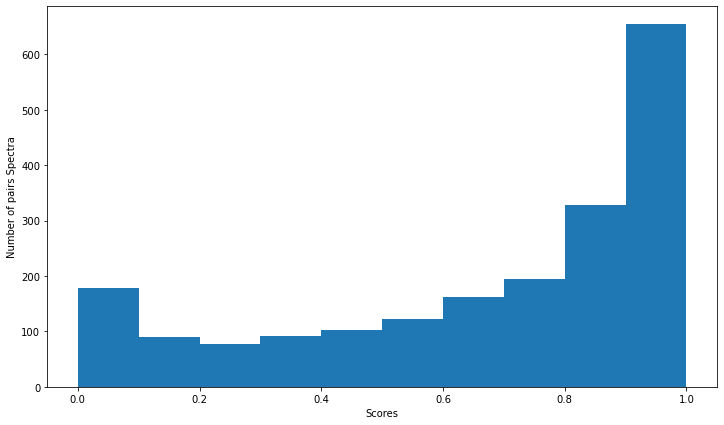

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
print(len(scores_hist))
hist = plt.hist(scores_hist)
plt.xlabel("Scores")
plt.ylabel("Number of pairs Spectra")

hist

In [61]:
copy_spectra = spectrums.copy()
group_spectra = separate_by_diff_inchikey(copy_spectra)
scores_hist = calculate_similarity_scores(group_spectra)

1 ================================
Reference scan name: methyl 2,3,6-tri-o-methylglucopyranoside - Query scan name: 4-ethoxycarbonyl-1-methyl-4-phenylpiperidine meperidine,demerol
Reference InChiKey: wmajfvgseyzpmz-spfkkgswsa-n - Query InChiKey: xadcessvhjozhk-uhfffaoysa-n
Score: 0.1215
Number of matching peaks: 26
----------------------------
Reference scan name: 4-ethoxycarbonyl-1-methyl-4-phenylpiperidine meperidine,demerol - Query scan name: methyl 2,3,6-tri-o-methylglucopyranoside
Reference InChiKey: xadcessvhjozhk-uhfffaoysa-n - Query InChiKey: wmajfvgseyzpmz-spfkkgswsa-n
Score: 0.1215
Number of matching peaks: 26
----------------------------
2 ================================
Reference scan name: d-erythrose 4-phosphate - Query scan name: 12-aminododecanamide
Reference InChiKey: nghmdnpxvrffgs-iuyqgcfvsa-n - Query InChiKey: snnmlpuqkzgxoj-uhfffaoysa-n
Score: 0.0136
Number of matching peaks: 9
----------------------------
Reference scan name: 12-aminododecanamide - Query scan nam

78 ================================
Reference scan name: pentyl lactate - Query scan name: 2,6-diphenylpyridine
Reference InChiKey: gxohbwlpqhtypf-uhfffaoysa-n - Query InChiKey: pjuohdqxfnpprf-uhfffaoysa-n
Score: 0.0000
Number of matching peaks: 0
----------------------------
Reference scan name: 2,6-diphenylpyridine - Query scan name: pentyl lactate
Reference InChiKey: pjuohdqxfnpprf-uhfffaoysa-n - Query InChiKey: gxohbwlpqhtypf-uhfffaoysa-n
Score: 0.0000
Number of matching peaks: 0
----------------------------
79 ================================
Reference scan name: methyl 2-trimethylsiloxynonadecanoate - Query scan name: 2'-hydroxy-5,7-dimethylflavonol
Reference InChiKey: vmaqkurdbisndm-uhfffaoysa-n - Query InChiKey: jkotwemycdjubr-uhfffaoysa-n
Score: 0.0089
Number of matching peaks: 9
----------------------------
Reference scan name: 2'-hydroxy-5,7-dimethylflavonol - Query scan name: methyl 2-trimethylsiloxynonadecanoate
Reference InChiKey: jkotwemycdjubr-uhfffaoysa-n - Query InChi

Reference InChiKey: apsrjagzyonpll-vurmdhgxsa-n - Query InChiKey: oajznbbxwmppnu-uhfffaoysa-n
Score: 0.0012
Number of matching peaks: 6
----------------------------
127 ================================
Reference scan name: p-ethylacetophenone - Query scan name: 7,8-dimethylalloxazine
Reference InChiKey: nodgrwcmfmegjh-uhfffaoysa-n - Query InChiKey: zjtjuvijvllgsp-uhfffaoysa-n
Score: 0.0853
Number of matching peaks: 11
----------------------------
Reference scan name: 7,8-dimethylalloxazine - Query scan name: p-ethylacetophenone
Reference InChiKey: zjtjuvijvllgsp-uhfffaoysa-n - Query InChiKey: nodgrwcmfmegjh-uhfffaoysa-n
Score: 0.0853
Number of matching peaks: 11
----------------------------
128 ================================
Reference scan name: trans,trans-2,4-hexadienyl acetate - Query scan name: methyl 2-(4,6-diphenyl-2-pyrimidinylamino)benzoate
Reference InChiKey: pxvkypfrombalg-vnkdhwassa-n - Query InChiKey: xoqlgpyabgazcj-uhfffaoysa-n
Score: 0.0132
Number of matching peaks: 8
-

198 ================================
Reference scan name: n-2(e)-butenyl-n-butylhydroxyacetamide - Query scan name: delta-tocopherol
Reference InChiKey: yfpsypmbcrpwde-hwkanzrosa-n - Query InChiKey: gzifeoyasatjeh-vhfrwlagsa-n
Score: 0.0177
Number of matching peaks: 6
----------------------------
Reference scan name: delta-tocopherol - Query scan name: n-2(e)-butenyl-n-butylhydroxyacetamide
Reference InChiKey: gzifeoyasatjeh-vhfrwlagsa-n - Query InChiKey: yfpsypmbcrpwde-hwkanzrosa-n
Score: 0.0177
Number of matching peaks: 6
----------------------------
199 ================================
Reference scan name: methyl 4-methylenecyclohexanecarboxylate - Query scan name: 4,7-di(para-methoxyphenyl)-6-(pyridin-4-yl)-1,2,5-thiadiazolo(3,4-c)pyridine
Reference InChiKey: syrkanzkkkawnj-uhfffaoysa-n - Query InChiKey: uhawyeijqqtvge-uhfffaoysa-n
Score: 0.1190
Number of matching peaks: 15
----------------------------
Reference scan name: 4,7-di(para-methoxyphenyl)-6-(pyridin-4-yl)-1,2,5-thiadiazo

243 ================================
Reference scan name: propyl gallate - Query scan name: 5-androstenediol
Reference InChiKey: zthyoddohivtjv-uhfffaoysa-n - Query InChiKey: qadhlrwlcpcekt-lovvwnrfsa-n
Score: 0.1469
Number of matching peaks: 46
----------------------------
Reference scan name: 5-androstenediol - Query scan name: propyl gallate
Reference InChiKey: qadhlrwlcpcekt-lovvwnrfsa-n - Query InChiKey: zthyoddohivtjv-uhfffaoysa-n
Score: 0.1469
Number of matching peaks: 46
----------------------------
244 ================================
Reference scan name: 5,7-dihydroxy-6,8-dimethyl-4'-methoxyflavanone - Query scan name: l-cysteine sulfinic acid
Reference InChiKey: dztrdrpcroosog-uhfffaoysa-n - Query InChiKey: advptqaunprnpo-reohclbhsa-n
Score: 0.0097
Number of matching peaks: 19
----------------------------
Reference scan name: l-cysteine sulfinic acid - Query scan name: 5,7-dihydroxy-6,8-dimethyl-4'-methoxyflavanone
Reference InChiKey: advptqaunprnpo-reohclbhsa-n - Query InCh

315 ================================
Reference scan name: 2-heptenol - Query scan name: 2-mercaptopropionic acid methyl ester
Reference InChiKey: asfypvgaalgvnr-aatrikpksa-n - Query InChiKey: snwknpmdqonhkk-uhfffaoysa-n
Score: 0.0157
Number of matching peaks: 4
----------------------------
Reference scan name: 2-mercaptopropionic acid methyl ester - Query scan name: 2-heptenol
Reference InChiKey: snwknpmdqonhkk-uhfffaoysa-n - Query InChiKey: asfypvgaalgvnr-aatrikpksa-n
Score: 0.0157
Number of matching peaks: 4
----------------------------
316 ================================
Reference scan name: n-(para-chlorophenylcarbamoyl)-2-pyrrolidone - Query scan name: 3,4,5-trimethoxybenzoic acid
Reference InChiKey: liqarwoyaggjfv-uhfffaoysa-n - Query InChiKey: sjsofncyxjunbt-uhfffaoysa-n
Score: 0.0120
Number of matching peaks: 11
----------------------------
Reference scan name: 3,4,5-trimethoxybenzoic acid - Query scan name: n-(para-chlorophenylcarbamoyl)-2-pyrrolidone
Reference InChiKey: sjso

382 ================================
Reference scan name: 4-methylstyrene oxide - Query scan name: 1-acetyl-4-phenyl-3-(2-pyridyl)-2-pyrazoline
Reference InChiKey: qawjamqtrgcjmh-uhfffaoysa-n - Query InChiKey: niyiljajxqaima-uhfffaoysa-n
Score: 0.2341
Number of matching peaks: 10
----------------------------
Reference scan name: 1-acetyl-4-phenyl-3-(2-pyridyl)-2-pyrazoline - Query scan name: 4-methylstyrene oxide
Reference InChiKey: niyiljajxqaima-uhfffaoysa-n - Query InChiKey: qawjamqtrgcjmh-uhfffaoysa-n
Score: 0.2341
Number of matching peaks: 10
----------------------------
383 ================================
Reference scan name: trans-1-(diethyl(2-phenylethenyl)silyl-2-(diethyl)benzene - Query scan name: acetaldehyde di-trans-2-hexenyl acetal
Reference InChiKey: flkooyusmgbxqi-vhebqxmusa-n - Query InChiKey: fvxjkqgrpgcddf-gfulkkfksa-n
Score: 0.0308
Number of matching peaks: 5
----------------------------
Reference scan name: acetaldehyde di-trans-2-hexenyl acetal - Query scan name:

Reference InChiKey: wfwkngzodaoleo-uhfffaoysa-n - Query InChiKey: jecqalzmhmnolo-uhfffaoysa-n
Score: 0.0141
Number of matching peaks: 19
----------------------------
Reference scan name: ethyl isopropoxyacetate - Query scan name: para-methoxyphenylacetone
Reference InChiKey: jecqalzmhmnolo-uhfffaoysa-n - Query InChiKey: wfwkngzodaoleo-uhfffaoysa-n
Score: 0.0141
Number of matching peaks: 19
----------------------------
448 ================================
Reference scan name: octanal o-2,3,4,5,6-pentafluorobenzyloxime - Query scan name: cis-3-hexenyl 2-ethylbutyrate
Reference InChiKey: rlsqixnuittxkz-wnfqyiggsa-n - Query InChiKey: lfdwlvxnykqqbt-fplpwbnlsa-n
Score: 0.1159
Number of matching peaks: 18
----------------------------
Reference scan name: cis-3-hexenyl 2-ethylbutyrate - Query scan name: octanal o-2,3,4,5,6-pentafluorobenzyloxime
Reference InChiKey: lfdwlvxnykqqbt-fplpwbnlsa-n - Query InChiKey: rlsqixnuittxkz-wnfqyiggsa-n
Score: 0.1159
Number of matching peaks: 18
------------

510 ================================
Reference scan name: allyl 2-methylbutyrate - Query scan name: benzo(c)cinnoline
Reference InChiKey: zspljxgrhfjqko-uhfffaoysa-n - Query InChiKey: swjxwsakhxbqsy-uhfffaoysa-n
Score: 0.0067
Number of matching peaks: 5
----------------------------
Reference scan name: benzo(c)cinnoline - Query scan name: allyl 2-methylbutyrate
Reference InChiKey: swjxwsakhxbqsy-uhfffaoysa-n - Query InChiKey: zspljxgrhfjqko-uhfffaoysa-n
Score: 0.0067
Number of matching peaks: 5
----------------------------
511 ================================
Reference scan name: heptadecanoic acid trimethylsilyl ester - Query scan name: phthalimide
Reference InChiKey: kcezrirepddpdi-uhfffaoysa-n - Query InChiKey: xkjchhzqlqnzhy-uhfffaoysa-n
Score: 0.2022
Number of matching peaks: 6
----------------------------
Reference scan name: phthalimide - Query scan name: heptadecanoic acid trimethylsilyl ester
Reference InChiKey: xkjchhzqlqnzhy-uhfffaoysa-n - Query InChiKey: kcezrirepddpdi-uhff

567 ================================
Reference scan name: tetrahydrogeraniol - Query scan name: methyl (5z,8z,11z,14z)-eicosatetraenoate
Reference InChiKey: prncmakcnvrzfx-uhfffaoysa-n - Query InChiKey: ofidnkmqbygniw-zkwnwvnesa-n
Score: 0.2127
Number of matching peaks: 7
----------------------------
Reference scan name: methyl (5z,8z,11z,14z)-eicosatetraenoate - Query scan name: tetrahydrogeraniol
Reference InChiKey: ofidnkmqbygniw-zkwnwvnesa-n - Query InChiKey: prncmakcnvrzfx-uhfffaoysa-n
Score: 0.2127
Number of matching peaks: 7
----------------------------
568 ================================
Reference scan name: methacrylic acid diethyleneglycol ester - Query scan name: hexanal 2e-hexenyl 3z-hexenyl acetal
Reference InChiKey: olqfxowptqtldp-uhfffaoysa-n - Query InChiKey: hniiewowrpnmnr-bxhqfmresa-n
Score: 0.1039
Number of matching peaks: 16
----------------------------
Reference scan name: hexanal 2e-hexenyl 3z-hexenyl acetal - Query scan name: methacrylic acid diethyleneglycol es

640 ================================
Reference scan name: 2-phenylethyl isopropyl ether - Query scan name: hydroxyphenyllactic acid
Reference InChiKey: fmpxlxbvydfxic-uhfffaoysa-n - Query InChiKey: jvgvdssuavxrdy-uhfffaoysa-n
Score: 0.0221
Number of matching peaks: 16
----------------------------
Reference scan name: hydroxyphenyllactic acid - Query scan name: 2-phenylethyl isopropyl ether
Reference InChiKey: jvgvdssuavxrdy-uhfffaoysa-n - Query InChiKey: fmpxlxbvydfxic-uhfffaoysa-n
Score: 0.0221
Number of matching peaks: 16
----------------------------
641 ================================
Reference scan name: 2'-acetaminoflavanone - Query scan name: 2-ethylpyridine
Reference InChiKey: kgwsryuplpmqgy-uhfffaoysa-n - Query InChiKey: nrggmcibeheail-uhfffaoysa-n
Score: 0.0145
Number of matching peaks: 7
----------------------------
Reference scan name: 2-ethylpyridine - Query scan name: 2'-acetaminoflavanone
Reference InChiKey: nrggmcibeheail-uhfffaoysa-n - Query InChiKey: kgwsryuplpmqgy-uh

717 ================================
Reference scan name: 4-chloro-1-butene - Query scan name: 2-(trimethylsilylmethyl)benzaldehyde
Reference InChiKey: wkevrzcqfqdcir-uhfffaoysa-n - Query InChiKey: jlrrmhmdthmand-uhfffaoysa-n
Score: 0.0064
Number of matching peaks: 4
----------------------------
Reference scan name: 2-(trimethylsilylmethyl)benzaldehyde - Query scan name: 4-chloro-1-butene
Reference InChiKey: jlrrmhmdthmand-uhfffaoysa-n - Query InChiKey: wkevrzcqfqdcir-uhfffaoysa-n
Score: 0.0064
Number of matching peaks: 4
----------------------------
718 ================================
Reference scan name: (1r,2s,5r)-5-methyl-2-(1-methyl-1-(2'-naphthyl)ethyl)-cyclohexane-1-yl benzoate - Query scan name: ethyl 3-ethyl-4-methylpyrrole-2-carboxylate
Reference InChiKey: jrxoqoltdohkhn-ukdvssazsa-n - Query InChiKey: ijimbhgenkkalu-uhfffaoysa-n
Score: 0.0211
Number of matching peaks: 17
----------------------------
Reference scan name: ethyl 3-ethyl-4-methylpyrrole-2-carboxylate - Query sca

----------------------------
793 ================================
Reference scan name: 3-hydroxyisovaleric acid - Query scan name: 2-butylcyclopenanone
Reference InChiKey: axfyfncponwuhw-uhfffaoysa-n - Query InChiKey: zaqyrxdjfinjje-uhfffaoysa-n
Score: 0.0024
Number of matching peaks: 4
----------------------------
Reference scan name: 2-butylcyclopenanone - Query scan name: 3-hydroxyisovaleric acid
Reference InChiKey: zaqyrxdjfinjje-uhfffaoysa-n - Query InChiKey: axfyfncponwuhw-uhfffaoysa-n
Score: 0.0024
Number of matching peaks: 4
----------------------------
794 ================================
Reference scan name: methyl eugenol - Query scan name: 1,3-dibromobenzene
Reference InChiKey: zyemgpiyfijgtp-uhfffaoysa-n - Query InChiKey: jsrlurszemlafo-uhfffaoysa-n
Score: 0.0326
Number of matching peaks: 12
----------------------------
Reference scan name: 1,3-dibromobenzene - Query scan name: methyl eugenol
Reference InChiKey: jsrlurszemlafo-uhfffaoysa-n - Query InChiKey: zyemgpiyfijgtp-

844 ================================
Reference scan name: 5,10-dihydrophenazine - Query scan name: meta nitrotoluene
Reference InChiKey: ivurtnnwjapoml-uhfffaoysa-n - Query InChiKey: qzyhiopplupujf-uhfffaoysa-n
Score: 0.0293
Number of matching peaks: 12
----------------------------
Reference scan name: meta nitrotoluene - Query scan name: 5,10-dihydrophenazine
Reference InChiKey: qzyhiopplupujf-uhfffaoysa-n - Query InChiKey: ivurtnnwjapoml-uhfffaoysa-n
Score: 0.0293
Number of matching peaks: 12
----------------------------
845 ================================
Reference scan name: 4-(3-acetoxyphenoxy)benzoic acid - Query scan name: 2-(trifluoromethyl)cinnamic acid
Reference InChiKey: pyjzfscakhrlsc-uhfffaoysa-n - Query InChiKey: amvyaixpagbxom-aatrikpksa-n
Score: 0.0004
Number of matching peaks: 6
----------------------------
Reference scan name: 2-(trifluoromethyl)cinnamic acid - Query scan name: 4-(3-acetoxyphenoxy)benzoic acid
Reference InChiKey: amvyaixpagbxom-aatrikpksa-n - Query I

907 ================================
Reference scan name: l-(+)-lysine - Query scan name: 4-phenyltridecane
Reference InChiKey: kdxkernsbixsrk-yfkpbyrvsa-n - Query InChiKey: rzgvzpawcgdmck-uhfffaoysa-n
Score: 0.0093
Number of matching peaks: 4
----------------------------
Reference scan name: 4-phenyltridecane - Query scan name: l-(+)-lysine
Reference InChiKey: rzgvzpawcgdmck-uhfffaoysa-n - Query InChiKey: kdxkernsbixsrk-yfkpbyrvsa-n
Score: 0.0093
Number of matching peaks: 4
----------------------------
908 ================================
Reference scan name: 5,8-dichloro-4-chlomanone-2-ol - Query scan name: n-benzyl-3-methoxycarbonylpyrrolidine
Reference InChiKey: obivnyoblulrfu-uhfffaoysa-n - Query InChiKey: gdwfcuofvsnttg-uhfffaoysa-n
Score: 0.0480
Number of matching peaks: 14
----------------------------
Reference scan name: n-benzyl-3-methoxycarbonylpyrrolidine - Query scan name: 5,8-dichloro-4-chlomanone-2-ol
Reference InChiKey: gdwfcuofvsnttg-uhfffaoysa-n - Query InChiKey: obiv

968 ================================
Reference scan name: n-tert-butyl-2,4-dinitrobenzenamine - Query scan name: diethyldiiodosilane
Reference InChiKey: claaawamiuwegs-uhfffaoysa-n - Query InChiKey: gptnehswpushfx-uhfffaoysa-n
Score: 0.0622
Number of matching peaks: 6
----------------------------
Reference scan name: diethyldiiodosilane - Query scan name: n-tert-butyl-2,4-dinitrobenzenamine
Reference InChiKey: gptnehswpushfx-uhfffaoysa-n - Query InChiKey: claaawamiuwegs-uhfffaoysa-n
Score: 0.0622
Number of matching peaks: 6
----------------------------
969 ================================
Reference scan name: 3,5-bis(2-hydroxyethyl)cyclopentene - Query scan name: 1h-tetrazole
Reference InChiKey: ughqhtmvearzss-uhfffaoysa-n - Query InChiKey: kjuguadjhnhals-uhfffaoysa-n
Score: 0.0000
Number of matching peaks: 0
----------------------------
Reference scan name: 1h-tetrazole - Query scan name: 3,5-bis(2-hydroxyethyl)cyclopentene
Reference InChiKey: kjuguadjhnhals-uhfffaoysa-n - Query InChi

(array([1628.,  212.,   80.,   36.,   20.,   18.,    2.,    2.,    0.,
           2.]),
 array([0.        , 0.08430896, 0.16861792, 0.25292688, 0.33723584,
        0.4215448 , 0.50585376, 0.59016272, 0.67447168, 0.75878064,
        0.8430896 ]),
 <a list of 10 Patch objects>)

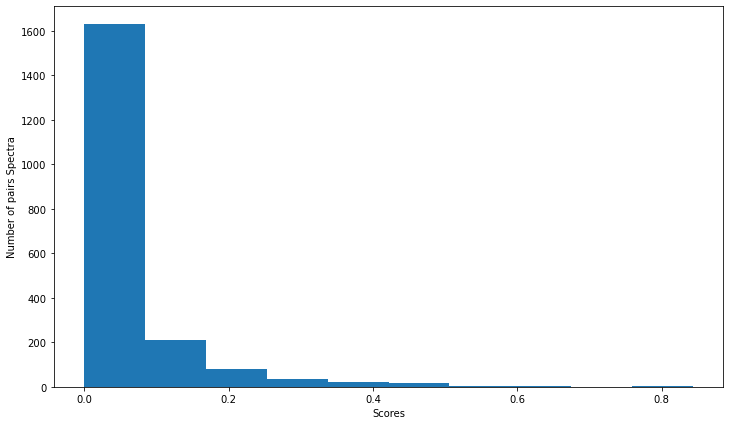

In [62]:
plt.figure(figsize=(12,7))
hist = plt.hist(scores_hist)
plt.xlabel("Scores")
plt.ylabel("Number of pairs Spectra")

hist